# Time Series Forecasting with LSTM in PyTorch

## Abstract
This notebook provides a comprehensive guide to time series forecasting using Long Short-Term Memory (LSTM) networks implemented in PyTorch. The tutorial covers the entire workflow, from loading and preprocessing a financial dataset to defining, training, and evaluating an LSTM model. By the end of this notebook, users will have a solid understanding of how to apply LSTM networks for predicting stock or cryptocurrency prices, along with visualizing the model's performance against actual values.

## Content
1. **Introduction**: Overview of the notebook and its objectives.
2. **Load and Preprocess Data**: Steps to load, normalize, and prepare the time series data for training.
3. **Define the LSTM Model**: Construction of the LSTM model using PyTorch.
4. **Train the Model**: Training the LSTM model with the prepared dataset.
5. **Evaluate and Visualize Results**: Visualizing the model's predictions and comparing them with actual values.



## 1. Introduction
This Jupyter Notebook demonstrates how to build and train a Long Short-Term Memory (LSTM) network using PyTorch for time series forecasting. The model can be applied to a financial dataset to predict stock or cryptocurrency prices.

## objective
 - asds
 - asdas
 - aas

In [83]:
!nvidia-sml -l

'nvidia-sml' is not recognized as an internal or external command,
operable program or batch file.


In [84]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

## 2. Load and Preprocess Data
Load a time series dataset (e.g., stock prices, cryptocurrency values), in our case we will use a cryptocurrency price value, normalize the data, and prepare it for training.

The sequence length is set to 10, meaning that each input sequence to the LSTM model will consist of 10 consecutive time steps from the dataset. This allows the model to learn patterns and dependencies over these 10 time steps to make predictions.

The `MinMaxScaler` is used to normalize the 'Close' prices of the cryptocurrency data to a range between 0 and 1. Normalizing the data helps the model to train more effectively and converge faster.

The `create_sequences` function generates sequences of data for the LSTM input. It takes the normalized data and a sequence length as input and returns sequences and corresponding target values. Each sequence consists of `seq_length` time steps, and the target is the value immediately following the sequence.

In [85]:
# Load and scale data
# Read the CSV file containing the cryptocurrency price data
data = pd.read_csv('Enhanced_Bitcoin_2023_2024.csv')

# Initialize the StandardScaler to scale the 'Close' prices between 0 and 1
scaler = StandardScaler()

# Fit the scaler on the 'Close' prices and transform the data
data_scaled = scaler.fit_transform(data[['close']].values.reshape(-1, 1))

# Function to create sequences of data for LSTM input
def create_sequences(data, seq_length=10):
    sequences, targets = [], []
    # Loop through the data to create sequences and corresponding targets
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])  # Sequence of length `seq_length`
        targets.append(data[i + seq_length])      # Target value after the sequence
    # Convert sequences and targets to PyTorch tensors
    return torch.tensor(sequences, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32)

# Define the sequence length
seq_length = 40

# Create sequences and targets from the scaled data
X_train, y_train = create_sequences(data_scaled, seq_length)

# Create a DataLoader to handle batching and shuffling of the training data
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)

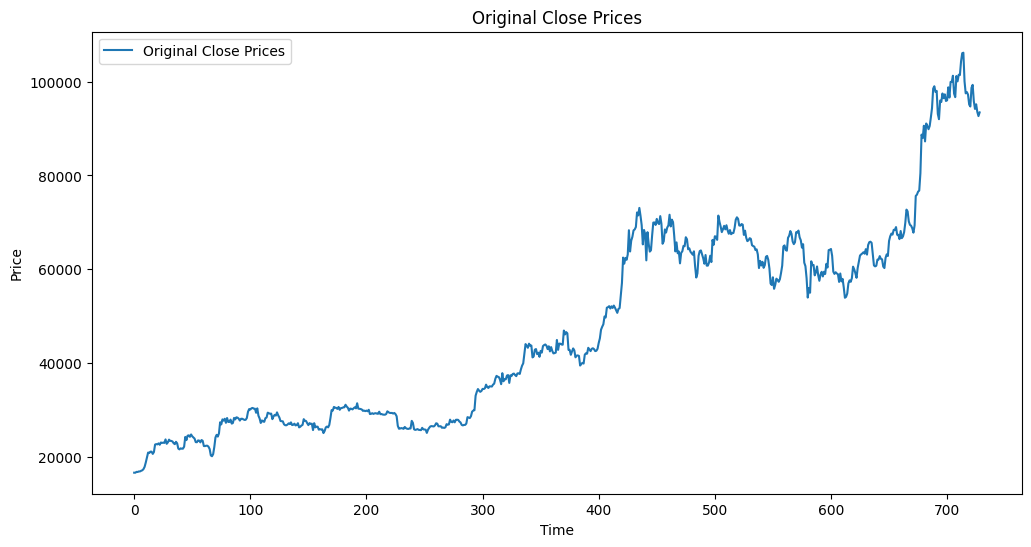

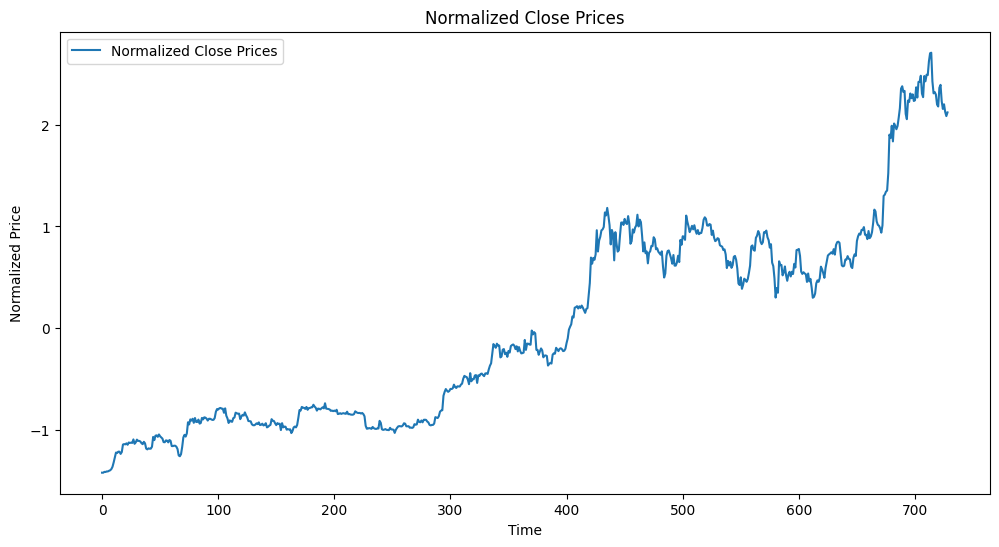

In [86]:
# Plot original 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(data['close'], label='Original Close Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Original Close Prices')
plt.legend()
plt.show()

# Plot normalized 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(data_scaled, label='Normalized Close Prices')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title('Normalized Close Prices')
plt.legend()
plt.show()

## pytorch data set

## 3. Define the LSTM Model
Construct an LSTM model using PyTorch.

In [87]:
class TimeSeriesLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=128, num_layers=3):
        super(TimeSeriesLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, 1)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

model = TimeSeriesLSTM()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

## 4. Train the Model
Train the LSTM model using the dataset.

In [88]:
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

train_model(model, train_loader, criterion, optimizer, epochs=100)


c:\Users\Emman\anaconda3\envs\newEnv\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([32, 1, 1])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Emman\anaconda3\envs\newEnv\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([17, 1, 1])) that is different to the input size (torch.Size([17, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Loss: 0.7354
Epoch 2, Loss: 0.8389
Epoch 3, Loss: 0.9029
Epoch 4, Loss: 0.9208
Epoch 5, Loss: 1.2853
Epoch 6, Loss: 1.0054
Epoch 7, Loss: 0.6219
Epoch 8, Loss: 0.7115
Epoch 9, Loss: 1.0707
Epoch 10, Loss: 0.8897
Epoch 11, Loss: 1.2116
Epoch 12, Loss: 0.8281
Epoch 13, Loss: 1.3596
Epoch 14, Loss: 0.9104
Epoch 15, Loss: 0.8376
Epoch 16, Loss: 1.2786
Epoch 17, Loss: 0.6865
Epoch 18, Loss: 0.8041
Epoch 19, Loss: 0.9416
Epoch 20, Loss: 1.5958
Epoch 21, Loss: 0.7166
Epoch 22, Loss: 0.8446
Epoch 23, Loss: 1.0648
Epoch 24, Loss: 1.5398
Epoch 25, Loss: 1.1603
Epoch 26, Loss: 1.1353
Epoch 27, Loss: 1.1364
Epoch 28, Loss: 1.1248
Epoch 29, Loss: 0.8402
Epoch 30, Loss: 1.1473
Epoch 31, Loss: 1.5640
Epoch 32, Loss: 0.7389
Epoch 33, Loss: 1.1596
Epoch 34, Loss: 1.0275
Epoch 35, Loss: 1.1017
Epoch 36, Loss: 0.6777
Epoch 37, Loss: 0.9945
Epoch 38, Loss: 0.6013
Epoch 39, Loss: 0.6656
Epoch 40, Loss: 1.1237
Epoch 41, Loss: 0.6873
Epoch 42, Loss: 1.0701
Epoch 43, Loss: 1.0379
Epoch 44, Loss: 0.89

## 5. Evaluate and Visualize Results
Visualize predictions and compare with actual values.

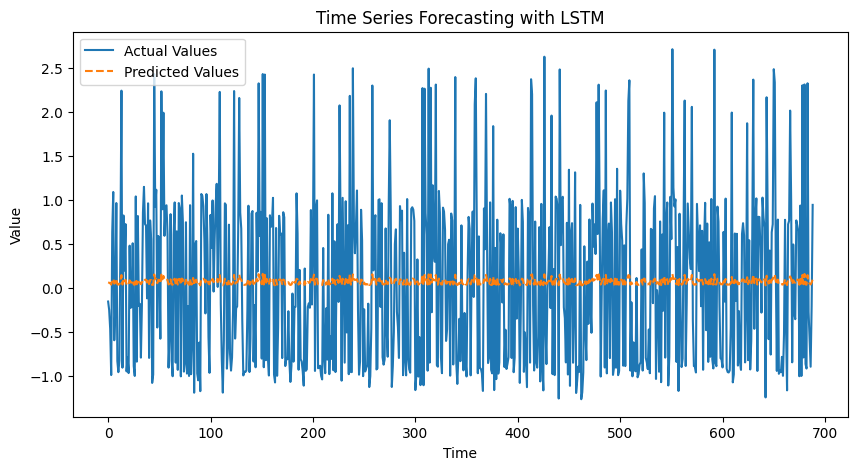

Mean Squared Error: 0.9012
R-squared Score: 0.0666
Mean Absolute Percentage Error: 100.6103


In [90]:
model.eval()
predictions, actuals = [], []

with torch.no_grad():
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        predictions.extend(y_pred.numpy().flatten())
        actuals.extend(y_batch.numpy().flatten())

# Plot results
plt.figure(figsize=(10,5))
plt.plot(actuals, label='Actual Values')
plt.plot(predictions, label='Predicted Values', linestyle='dashed')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecasting with LSTM')
plt.show()

#print the accuracy of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(actuals, predictions)
print(f'Mean Squared Error: {mse:.4f}')

# Calculate and print the R-squared score
r2 = r2_score(actuals, predictions)
print(f'R-squared Score: {r2:.4f}')

#calculate the anothe accuracy metric
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actuals, predictions)

print(f'Mean Absolute Percentage Error: {mape:.4f}')

## Discussion

## Conclusion